In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

In [2]:
import yfinance as yf

In [3]:
ms = yf.download('MSFT' , start="2012-01-01",end="2021-12-31",progress=False)

ms

/tmp/ipython-input-779584476.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ms = yf.download('MSFT' , start="2012-01-01",end="2021-12-31",progress=False)


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2012-01-03,21.004677,21.153756,20.706515,20.832056,64731500
2012-01-04,21.498999,21.553923,21.012526,21.043910,80516100
2012-01-05,21.718695,21.757926,21.412688,21.483303,56081400
2012-01-06,22.056087,22.118858,21.600999,21.600999,99455500
2012-01-09,21.765770,22.048239,21.750077,22.009006,59706800
...,...,...,...,...,...
2021-12-23,324.446442,326.094423,322.546438,322.565815,19617800
2021-12-27,331.968903,331.997983,325.163740,325.192820,19947000


In [4]:
df  = ms[['Open' , 'Close' , 'High' , 'Low' ]].round(3)
df

Price,Open,Close,High,Low
Ticker,MSFT,MSFT,MSFT,MSFT
Date,,,,
2012-01-03,20.832,21.005,21.154,20.707
2012-01-04,21.044,21.499,21.554,21.013
2012-01-05,21.483,21.719,21.758,21.413
2012-01-06,21.601,22.056,22.119,21.601
2012-01-09,22.009,21.766,22.048,21.750
...,...,...,...,...
2021-12-23,322.566,324.446,326.094,322.546
2021-12-27,325.193,331.969,331.998,325.164


<Axes: xlabel='Date'>

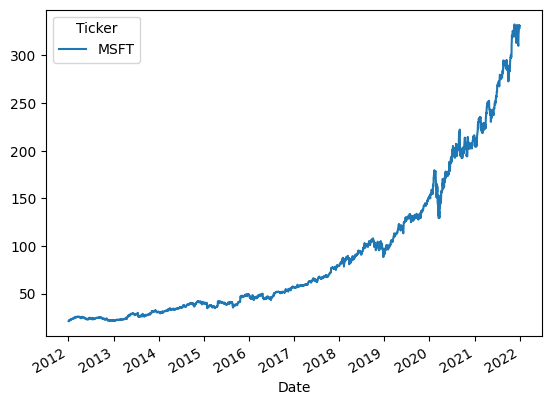

In [5]:
df.Close.plot()

In [6]:
df.Close[:'2020-01-01'].values

array([[ 21.005],
       [ 21.499],
       [ 21.719],
       ...,
       [151.212],
       [149.909],
       [150.013]])

In [7]:
df.Close[:'2020-01-01'].values.reshape(-1,1)

array([[ 21.005],
       [ 21.499],
       [ 21.719],
       ...,
       [151.212],
       [149.909],
       [150.013]])

In [16]:
def ts_data(_df, X_steps, y_steps):
    # Split the data
    train_df = _df.Close[:'2020'].values.reshape(-1, 1)
    test_df = _df.Close['2021':].values.reshape(-1, 1)
    # sc =MinMaxScaler(feature_range=(0,1))
    # train_df = sc.fit_transform(train_df)
    # Prepare training data
    X_train = []
    y_train = []
    for i in range(X_steps, len(train_df) - y_steps + 1):
        X_train.append(train_df[i - X_steps:i])  # shape: (X_steps, 1)
        y_train.append(train_df[i:i + y_steps].flatten())  # shape: (y_steps,)

    # Prepare testing data
    X_test = []
    y_test = []
    for i in range(X_steps, len(test_df) - y_steps + 1):
        X_test.append(test_df[i - X_steps:i])
        y_test.append(test_df[i:i + y_steps].flatten())

    # Convert to numpy arrays
    X_train = np.array(X_train)  # shape: (samples, X_steps, 1)
    y_train = np.array(y_train)  # shape: (samples, y_steps)
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    return X_train, y_train, X_test, y_test

In [17]:
X_train, y_train, X_test, y_test = ts_data(df ,30,2)

In [18]:
X_train.shape

(2234, 30, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense ,SimpleRNN

In [12]:
simple_rnn_model = Sequential([
    SimpleRNN(50,return_sequences=True),
    SimpleRNN(50),
    Dense(2)
])

In [13]:
simple_rnn_model.compile(optimizer='adam' ,loss='mse')

In [14]:
simple_rnn_model.fit(X_train,y_train,epochs=100,validation_split=0.15)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 3456.6038 - val_loss: 28066.2852
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2901.8667 - val_loss: 27021.8691
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2718.6006 - val_loss: 26073.0352
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2383.1936 - val_loss: 25184.7539
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2270.0706 - val_loss: 24351.5156
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2158.5847 - val_loss: 23564.2539
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1876.2699 - val_loss: 22838.8145
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1740.4558 - val_loss: 22149.4238
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1538.5891 - val_loss: 21508.2949
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1527.2777 - val_loss: 20904.2031
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1367.3566 - val_l